<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset includes patient demographics, scheduling ...etc show  information from 100k medical appointments in Brazil and The goal is to predict whether patients will attend their scheduled appointments.
#### No show appointments
This table has the following 14 columns: 
##### 1. PatientId(float64):
A unique identifier for each patient, used to distinguish between different patients. 
##### 2. AppointmentID(int64):
A unique identifier for each appointment, used to uniquely identify appointments.
##### 3. Gender(object):
The gender of the patient, which can be "boy" or "girl".
##### 4. ScheduledDay(object):
The day the patient set up their appointment. 
##### 5. AppointmentDay(object):
The date of the scheduled appointment when the patient is supposed to visit the clinic.              
##### 6. Age(int64):
The age of the patient in years.        
##### 7. Neighbourhood(object):
The location of the hospital.   
##### 8. Scholarship(int64):
Indicates whether the patient is enrolled in the Brazilian welfare program Bolsa Família (0: No, 1: Yes).    
##### 9. Hipertension(int64):
Indicates whether the patient has hypertension (0: No, 1: Yes).        
##### 10. Diabetes(int64):
Indicates whether the patient has diabetes (0: No, 1: Yes).    
##### 11. Alcoholism(int64):
Indicates whether the patient has a history of alcoholism (0: No, 1: Yes).
##### 12. Handcap(int64):
Indicates whether the patient has any disability (0: No, 1: Yes).
##### 13. SMS_received(int64):
Indicates whether the patient received an SMS reminder for their appointment (0: No, 1: Yes).
##### 14. No-show (object):
Indicates whether the patient showed up for their appointment (No: showed up, Yes: did not show up). 
 
### Question(s) for Analysis
###### -Is there a noticeable difference in how often male and female patients miss their appointments?

###### - Does receiving an SMS reminder affect the likelihood of a patient showing up for their appointment?
 

 

<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#load the dataset 
file_path_csv = 'Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(file_path_csv)
#to check how data looks like by printing a few rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# print a few last lines
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# show the number of rows & number of columns
df.shape

(110527, 14)

In [5]:
# to know what the data type of evry single coulom 
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
# get info on table (data types and checking for the missing data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#to returns number of unique values for each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

so here we can confirm that the AppointmentID is the primary key of this table

In [8]:
#check if there are any missing data
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

We can notice that theres no missing data


In [9]:
# Check if there are any duplicated rows in the DataFrame
df.duplicated().any()

False

In [10]:
#Summary the d# Generate summary statistics for numerical columns in the DataFrame
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we can see that the age have a min value equal -1 .. so I'll check the age 

In [11]:
#check the age 
df.query("Age <= 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


<a id='cleaning'></a>
## Cleaning  data

In [12]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [13]:
# Handle negative ages or zero by replacing them with NaN values
df.loc[df['Age'] <= 0, 'Age'] = np.nan

In [14]:
# Check for negative ages or zero again to confirm handling
ages_after_handling = df[df['Age'] <= 0]

In [15]:
# Print rows with negative ages after handling
print("Rows with negative ages or zero after handling:")
ages_after_handling


Rows with negative ages or zero after handling:


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [16]:
# Drop rows with negative ages or zero after handling
df = df[df['Age'] > 0]

In [17]:
# Query the DataFrame to find rows where Age is less than or equal to zero
df.query("Age <= 0")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [18]:
# Check for null values in the DataFrame
# Returns a boolean Series indicating if each column has null values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [19]:
#Convert ScheduledDay and AppointmentDay from object to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
#return the datatypes of the columns to check
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                           float64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [20]:
# Verify the cleaning steps
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       106987 non-null  float64            
 1   AppointmentID   106987 non-null  int64              
 2   Gender          106987 non-null  object             
 3   ScheduledDay    106987 non-null  datetime64[ns, UTC]
 4   AppointmentDay  106987 non-null  datetime64[ns, UTC]
 5   Age             106987 non-null  float64            
 6   Neighbourhood   106987 non-null  object             
 7   Scholarship     106987 non-null  int64              
 8   Hipertension    106987 non-null  int64              
 9   Diabetes        106987 non-null  int64              
 10  Alcoholism      106987 non-null  int64              
 11  Handcap         106987 non-null  int64              
 12  SMS_received    106987 non-null  int64              
 13  No-show       

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [21]:
# Save the cleaned dataset to a new CSV file
df.to_csv("noshow_v2.csv", index=False)

# Load the saved CSV file into a new DataFrame
df_copy = pd.read_csv('noshow_v2.csv')

# Display the first few rows of the new DataFrame to verify successful loading
df_copy.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
df_copy.shape

(106987, 14)

### here I'll create a copy for my dataset 

In [23]:
df_v2 = df.copy()
#check it 
print (df_v2.head())
print (df_v2.info())
df_v2.shape

      PatientId  AppointmentID Gender              ScheduledDay  \
0  2.987250e+13        5642903      F 2016-04-29 18:38:08+00:00   
1  5.589978e+14        5642503      M 2016-04-29 16:08:27+00:00   
2  4.262962e+12        5642549      F 2016-04-29 16:19:04+00:00   
3  8.679512e+11        5642828      F 2016-04-29 17:29:31+00:00   
4  8.841186e+12        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay   Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00  62.0    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00  56.0    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00  62.0      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00   8.0  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00  56.0    JARDIM DA PENHA            0   

   Hipertension  Diabetes  Alcoholism  Handcap  SMS_received No-show  
0             1         0           0        0             0      No  
1             0         0           0   

(106987, 14)

<a id='eda'></a>
## Exploratory Data Analysis


In [24]:
#I defined the graphics as functions so that I could use them more than once in answering questions
def create_pie_chart(df, chart_title):
    """
    Generate a pie chart using the given DataFrame.
    
    Parameters:
    - df: DataFrame containing the data to plot
    - chart_title: str, the title of the chart
    """
    colors = ['#ADD8E6', '#808080']
    df.plot.pie(subplots=True, autopct='%1.1f%%', colors=colors, startangle=90, figsize=(10, 5))
    plt.title(chart_title)
    plt.legend(title='No-show', loc='upper right')
    plt.show()


In [25]:
def plot_bar_chart(data, title, xlabel, ylabel):
    """
    Plot a bar chart based on the provided data.
    
    Parameters:
    - data: DataFrame, input data for plotting
    - title: str, title of the plot
    - xlabel: str, label for the x-axis
    - ylabel: str, label for the y-axis
    """
    data.plot(kind='bar', stacked=True, alpha=0.7)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=0)
    plt.legend(title='No-show', loc='upper right')
    plt.show()


### Research Question 1 
#### (Is there a noticeable difference in how often male and female patients miss their appointments?)

In [26]:
# Calculate the proportion of missed appointments for each gender
missed_by_gender = df.groupby('Gender')['No-show'].value_counts(normalize=True).unstack()

# Print the proportions
print(missed_by_gender)


No-show        No       Yes
Gender                     
F        0.796415  0.203585
M        0.799154  0.200846


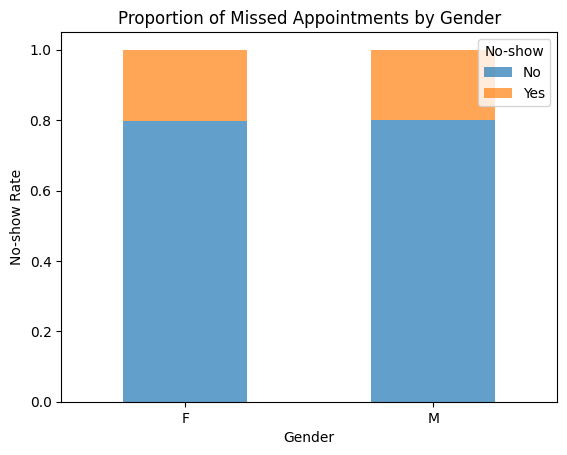

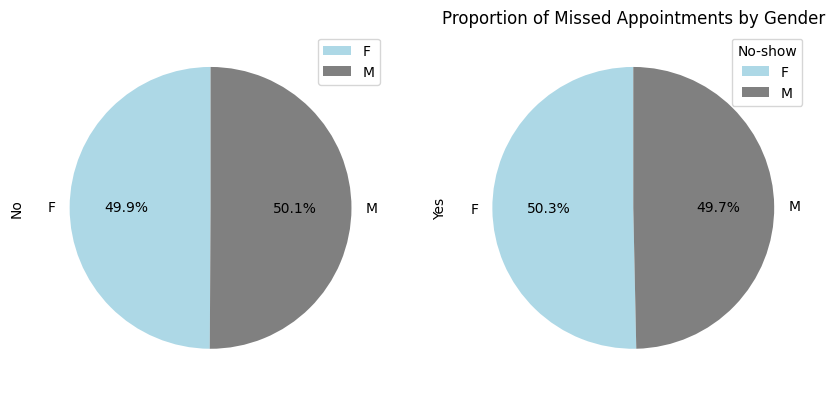

In [27]:
# Plot bar chart for proportion of missed appointments by SMS received 
plot_bar_chart(missed_by_gender, "Proportion of Missed Appointments by Gender",  'Gender', 'No-show Rate' )

# Plot pie chart for proportion of missed appointments by gender
create_pie_chart(missed_by_gender, "Proportion of Missed Appointments by Gender")

## Research Question 1

We calculated the proportion of missed appointments for each gender and found the following:

### Visualization Insights:
 Despite slight numerical differences, visually, both genders have similar rates of missed appointments, indicating a fair analysis.

## Research Question 2 
#### (Does receiving an SMS reminder affect the likelihood of a patient showing up for their appointment?)

In [28]:
# Convert textual values in the "No-show" column into numerical values (0 and 1)
df['No-show'] = df['No-show'].replace({'No': 0, 'Yes': 1})

In [29]:
# Calculate the no-show rates based on receiving SMS
sms_no_show_rates = df.groupby('SMS_received')['No-show'].mean()
print(sms_no_show_rates)

SMS_received
0    0.167288
1    0.276652
Name: No-show, dtype: float64


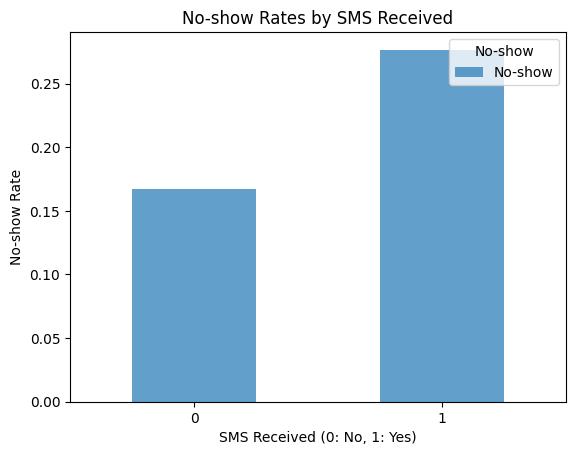

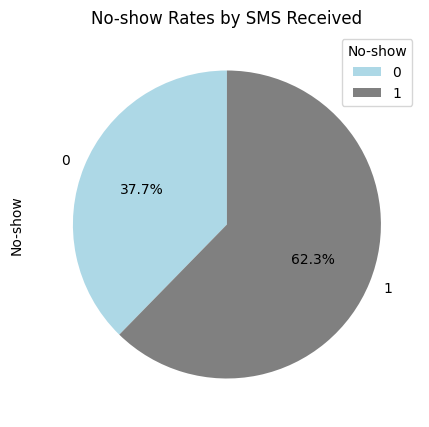

In [30]:
# Plot bar chart for proportion of missed appointments by SMS received 
plot_bar_chart(sms_no_show_rates, 'No-show Rates by SMS Received',  'SMS Received (0: No, 1: Yes)', 'No-show Rate' )
# Plot pie chart for proportion of missed appointments by SMS received

create_pie_chart(sms_no_show_rates,'No-show Rates by SMS Received' )

<a id='conclusions'></a>


## Research Question 2
Unexpectedly,patients who received SMS reminders had higher no-show rates than those who didn't. 
### Visualization Insights:
The planners showed almost the same result, as the number of non-attendees among those who received the message was greater than those who did not receive it


## Conclusions

### Summary:

- **Gender**: Gender did not affect the no-show rate.
  
- **SMS Reminders**: Surprisingly, SMS reminders led to higher no-show rates.

### Limitations:

- **Data**: Limited to Brazil, potentially affecting generalization.
  
- **Encoding**: 'No' indicating attendance and 'Yes' indicating non-attendance may confuse.

### Recommendations:

- **Explore Factors**: Investigate socioeconomic, transportation, and health impacts.

- **Temporal Analysis**: Study attendance patterns by time for deeper insights.


In [31]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 439188 bytes to Investigate_a_Dataset.html
